# Multi-Label Classification on MNIST Dataset.

> Importing Libraries & MNIST Dataset

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten 

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


> Representation of Dataset {it's in form of numpy array}

In [ ]:
X_train.shape # 3D-Array --> Data of 60K images in form of array
              # Every Image is 28 x 28 Numpy array

(60000, 28, 28)

In [ ]:
X_train[0] # 1st row --> 28 pixels then 2nd row --> 28 pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train  # Labels i.e, corresponding numerical values

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

> Plotting Digits corresponding to pixel values

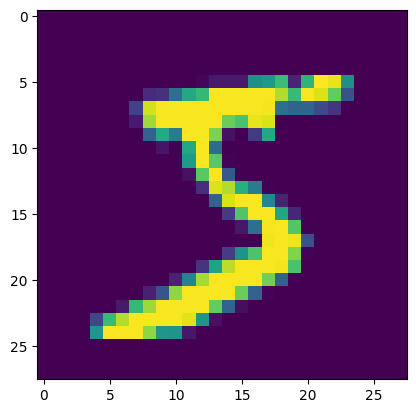

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

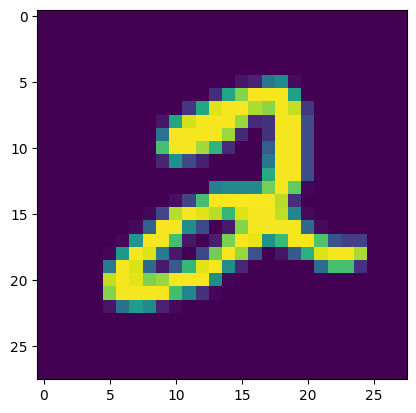

In [8]:
plt.imshow(X_train[5])

In [9]:
# Scaling / Normalization

X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

---

# **Why Use a Flatten Layer?**
✅ **Transforms 2D Input into 1D**: Neural networks work with 1D input vectors in fully connected layers. The **Flatten layer** reshapes the 28×28 image into a **single row of 784 values**.  
✅ **Ensures Compatibility with Dense Layers**: Dense layers (fully connected layers) require a **flat input**, so Flatten bridges the gap between convolutional layers (if any) and dense layers.  
✅ **Preserves Information**: Unlike pooling or convolution, flattening does not lose any pixel data; it just reshapes the input.  

---

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # 784 inputs

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()
# 784 inputs(flatten) --going to--> 128 node
# 784 * 128 => 100352 + 128(bias) ==> 100,480 param

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8618 - loss: 0.4917 - val_accuracy: 0.9543 - val_loss: 0.1608
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9593 - loss: 0.1389 - val_accuracy: 0.9657 - val_loss: 0.1126
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9752 - loss: 0.0857 - val_accuracy: 0.9707 - val_loss: 0.0962
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9816 - loss: 0.0612 - val_accuracy: 0.9732 - val_loss: 0.0890
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0461 - val_accuracy: 0.9736 - val_loss: 0.0865
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9890 - loss: 0.0367 - val_accuracy: 0.9743 - val_loss: 0.0905
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9914 - loss: 0.0303 - val_accuracy: 0.9722 - val_loss: 0.0933
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9932 - loss: 0.0231 -

In [16]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [17]:
y_pred = y_prob.argmax(axis=1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9761

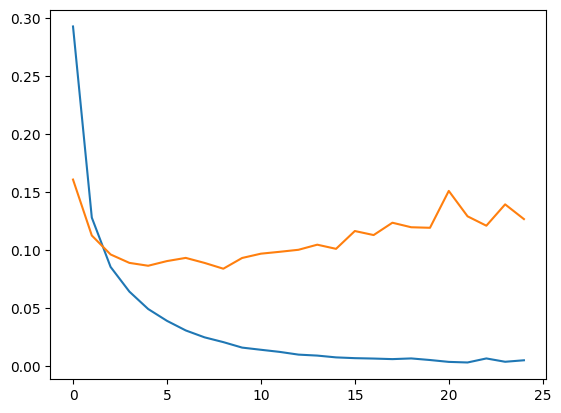

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])